In [43]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

12

In [44]:
t = np.array([0, 1, 3, 4])
b = np.array([0, 8, 8, 20]) 

# A column of ones and t 
A = np.vstack([np.ones(len(t)), t]).T  

# Normal eqs
ATA = A.T @ A  
ATb = A.T @ b 

x = np.linalg.solve(ATA,ATb)  

# heights

p = A @x

# errors

errors = b-p 

# Minimum squared error
MSE = np.sum(errors**2)

print("xhat :", x)
print("\nHeights p_i:",p)
print("\nErrors e_i:", errors)
print("\nMinimum squared error E:", MSE)


xhat : [1. 4.]

Heights p_i: [ 1.  5. 13. 17.]

Errors e_i: [-1.  3. -5.  3.]

Minimum squared error E: 44.0


18

Slope of best fit line, D: [4.30769231]

Heights p_i: [ 0.          4.30769231 12.92307692 17.23076923]

Errors e_i: [ 0.          3.69230769 -4.92307692  2.76923077]
Minimum squared error E: 45.538461538461554


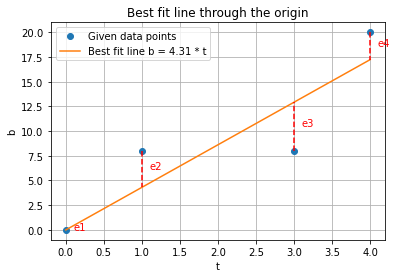

In [45]:
# no intercept, just t
A = t.reshape(-1, 1)  

# Normal eqs
ATA = A.T @ A  
ATb = A.T @ b 


D = np.linalg.solve(ATA, ATb)  

# heights
p = A @ D

# errors
errors = b - p  

# Minimum squared error
MSE = np.sum(errors**2) 


print("Slope of best fit line, D:", D)
print("\nHeights p_i:",p)
print("\nErrors e_i:", errors)
print("Minimum squared error E:", MSE)

plt.figure(figsize=(6, 4))
plt.plot(t, b, 'o',label="Given data points")
plt.plot(t, p, label=f"Best fit line b = {D[0]:.2f} * t")

# errors
for i in range(len(t)):
    plt.plot([t[i], t[i]],[b[i], p[i]], 'r--')  
    plt.text(t[i] + 0.1, (b[i] + p[i]) / 2, f'e{i+1}', color='r')

plt.xlabel("t")
plt.ylabel("b")
plt.title("Best fit line through the origin")
plt.legend()
plt.grid(True)
plt.show()

20

Coefficients C, D, E: [2.         1.33333333 0.66666667]

Heights p_i: [ 2.  4. 12. 18.]

Errors e_i: [-2.  4. -4.  2.]
Minimum squared error E: 40.00000000000001


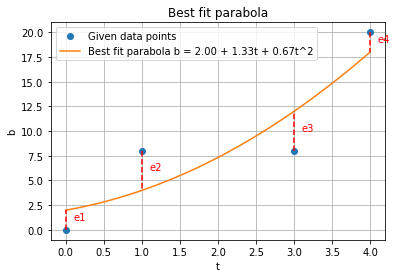

In [52]:
# matrix for parabola, columns 1,t,t^2
A = np.vstack([np.ones(len(t)), t, t**2]).T  

# Normal eqs
ATA = A.T @ A  # Compute A^T A
ATb = A.T @ b  # Compute A^T b

x = np.linalg.solve(ATA, ATb) 
C, D, E = x

# heights
p = A @ x

# errors
errors = b - p  

# Minimum squared error
MSE = np.sum(errors**2)


print("Coefficients C, D, E:",x)
print("\nHeights p_i:", p)
print("\nErrors e_i:",errors)
print("Minimum squared error E:", MSE)

t_plot = np.linspace(min(t),max(t), 800)
b_fit = C + D * t_plot + E *t_plot**2

plt.figure(figsize=(6, 4))
plt.plot(t, b, 'o', label="Given data points")
plt.plot(t_plot, b_fit, label=f"Best fit parabola b = {C:.2f} + {D:.2f}t + {E:.2f}t^2")

# errors
for i in range(len(t)):
    plt.plot([t[i], t[i]], [b[i],p[i]], 'r--')  
    plt.text(t[i] + 0.1, (b[i] + p[i]) / 2, f'e{i+1}', color='r') 

plt.xlabel("t")
plt.ylabel("b")
plt.title("Best fit parabola")
plt.legend()
plt.grid(True)
plt.show()


In Figure II.3b, instead of a curve, the vector $\mathbf{b} = (0, 8, 8, 20)$ is projected onto the plane defined by $\mathbf{a_1} = (1, 1, 1, 1)$ and $\mathbf{a_2} = (0, 1, 3, 4)$. This projection $\mathbf{p} = C \mathbf{a_1} + D \mathbf{a_2}$, is the best linear approximation of $\mathbf{b}$ in that plane. The error vector shows the part of $\mathbf{b}$ that can't be produced by any linear combination of $\mathbf{a_1}$ and $\mathbf{a_2}$.

2

a

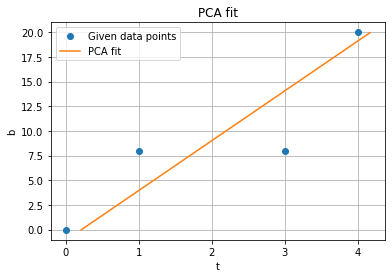

In [48]:
# center data
t_centered = t - np.mean(t)
b_centered = b - np.mean(b)
data = np.vstack([t_centered, b_centered]).T  

# covariance matrix
cov_mat = np.cov(data.T)

evals, evects = np.linalg.eig(cov_mat)

# principal component is the largest eigenvector
princ_comp = evects[:,np.argmax(evals)]

# Project data onto largest eigenvector and transform back to original coordinates
pca_fit = data @ princ_comp[:, None] * princ_comp + np.array([np.mean(t),np.mean(b)])

plt.figure(figsize=(6, 4))
plt.plot(t, b, 'o', label="Given data points")
plt.plot(pca_fit[:, 0], pca_fit[:, 1], label="PCA fit")
plt.xlabel("t")
plt.ylabel("b")
plt.title("PCA fit")
plt.legend()
plt.grid(True)
plt.show()


b

In [49]:
#vertical
slope = princ_comp[1] / princ_comp[0]
intercept = np.mean(b) - slope * np.mean(t) 
pca_line = lambda t_val: intercept + slope * t_val
pca_vals=np.array([pca_line(0),pca_line(1),pca_line(3),pca_line(4)])

vert_dist=np.abs(b- pca_vals)
# Orthogonal distances (Euclidean)
orth_dist = np.sqrt(np.sum((data -data @ princ_comp[:, None] *princ_comp)**2,axis=1))

print("Orthogonal distances:",orth_dist)
print("Vertical distances:", vert_dist)


Orthogonal distances: [0.21300989 0.78661991 1.17525704 0.17562724]
Vertical distances: [1.09618909 4.04809455 6.04809455 0.90381091]


c

In [50]:
# Code from 12, best regression model in terms of MSE
A = np.vstack([np.ones(len(t)), t]).T  
ATA = A.T @ A  
ATb = A.T @ b 
x = np.linalg.solve(ATA,ATb)  
p = A @x
errors = b-p 
MSE = np.sum(errors**2)

# orthogonal distances
orth_dist_1 = np.abs(x[1]* t - b + x[0]) / np.sqrt(x[1]**2 + 1)

print("Linear regression:\nOrthogonal distances:", orth_dist_1)
print("Vertical distances:", np.abs(errors))

print("\nPCA:\nOrthogonal distances:",orth_dist)
print("Vertical distances:", vert_dist)


Linear regression:
Orthogonal distances: [0.24253563 0.72760688 1.21267813 0.72760688]
Vertical distances: [1. 3. 5. 3.]

PCA:
Orthogonal distances: [0.21300989 0.78661991 1.17525704 0.17562724]
Vertical distances: [1.09618909 4.04809455 6.04809455 0.90381091]


- The orthogonal distances for PCA are generally smaller to those for linear regression. This makes sense as PCA minimizes the orthogonal distances because it fits the line in the direction of maximum variance. Linear regression, focuses on minimizing the vertical distances.

- The opposite can be seen for vertical distances where Linear regression vertical distances are generally lower than PCA.


3 

Dataset 1:
(a) Support Vectors: [[-1  2]
 [ 3 -2]]

(b) on graph

(c) Optimal w: [-0.25  0.25]
Optimal b: 0.25

(d) Weights λ for each support vector (will be 0 for other datapoints): [0.0625 0.0625]


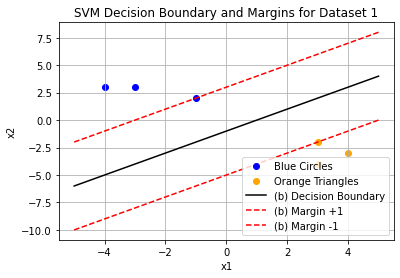

Dataset 2:
(a) Support Vectors: [[-1  2]
 [ 2 -1]]

(b) on graph

(c) Optimal w: [-0.33333333  0.33333333]
Optimal b: -3.300711388178424e-17

(d) Weights λ for each support vector (will be 0 for other datapoints): [0.11111111 0.11111111]


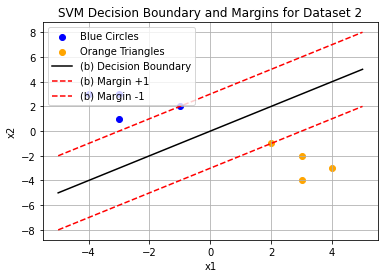

Dataset 3:
(a) Support Vectors: [[-1  2]
 [-1 -1]
 [ 1  1]]

(b) on graph

(c) Optimal w: [-1.00000000e+00 -2.39595303e-23]
Optimal b: 2.4891677404683406e-23

(d) Weights λ for each support vector (will be 0 for other datapoints): [0.33333333 0.16666667 0.5       ]


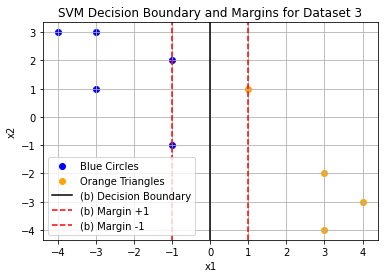

In [36]:
blue_circles_1 = np.array([[-4, 3], [-3, 3], [-1, 2]])
orange_triangles_1 = np.array([[3, -2], [3, -4], [4, -3]])

blue_circles_2 = np.array([[-4, 3], [-3, 3], [-3, 1], [-1, 2]])
orange_triangles_2 = np.array([[2, -1], [3, -2], [3, -4], [4, -3]])

blue_circles_3 = np.array([[-4, 3], [-3, 3], [-3, 1], [-1, 2], [-1, -1]])
orange_triangles_3 = np.array([[1, 1], [3, -2], [3, -4], [4, -3]])


def svm(blue_circ,orange_triang,name):
    X = np.vstack([blue_circ, orange_triang])
    #targets
    y = np.hstack([np.ones(len(blue_circ)), -1 * np.ones(len(orange_triang))])

    w = cp.Variable(2)
    b = cp.Variable()

    # Constraints,>= 1 for + and <= -1 for -
    constraints = [y[i] * (X[i] @ w + b) >= 1 for i in range(len(y))]

    # Objective 
    objective = cp.Minimize(0.5 * cp.sum_squares(w))

    # Form and solve problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    w_val = w.value
    b_val = b.value
    
    # Support vectors (points where to y_i * (w * x_i + b) ~ 1, to tol 1e-6)
    ind = np.where(np.abs(y * (X @ w_val + b_val) - 1) < 1e-6)[0]
    support_vect = X[ind]
    lambdas = np.array([constraints[i].dual_value for i in ind])

    print(f"Dataset {name}:")
    print("(a) Support Vectors:", support_vect)
    print("\n(b) on graph")
    print("\n(c) Optimal w:", w_val)
    print("Optimal b:", b_val)
    print("\n(d) Weights λ for each support vector (will be 0 for other datapoints):", lambdas)

    # data points
    plt.scatter(blue_circ[:, 0], blue_circ[:, 1], c='b', label='Blue Circles')
    plt.scatter(orange_triang[:, 0], orange_triang[:, 1], c='orange', label='Orange Triangles')

    
    # Near w_val[1]=0 (like for 3), the slope is nearly undefined, and decision boundary is a vertical line
    if np.isclose(w_val[1], 0, atol=1e-6):
        # w_val[1]~0
        x_decision = -b_val / w_val[0]
        plt.axvline(x_decision, color='k', label='(b) Decision Boundary')
        plt.axvline(x_decision - 1/np.abs(w_val[0]), color='r', linestyle='--', label='(b) Margin +1')
        plt.axvline(x_decision + 1/np.abs(w_val[0]), color='r', linestyle='--', label='(b) Margin -1')
    else:
        # Normal
        x_vals = np.linspace(-5, 5, 100)
        decision_function = lambda x: -(w_val[0] * x + b_val) / w_val[1]
        plt.plot(x_vals, decision_function(x_vals), 'k-', label='(b) Decision Boundary')
        plt.plot(x_vals, decision_function(x_vals - 1/w_val[0]), 'r--', label='(b) Margin +1')
        plt.plot(x_vals, decision_function(x_vals + 1/w_val[0]), 'r--', label='(b) Margin -1')

    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'SVM Decision Boundary and Margins for Dataset {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

svm(blue_circles_1, orange_triangles_1, "1")
svm(blue_circles_2, orange_triangles_2, "2")
svm(blue_circles_3, orange_triangles_3, "3")


4

a

We have the kernel function:  
$
k(x_1, x_2) = \cos\left(\frac{\pi}{4} x_1\right) \cos\left(\frac{\pi}{4} x_2\right) + \sin\left(\frac{\pi}{4} x_1\right) \sin\left(\frac{\pi}{4} x_2\right)
$

Using the trig identity $\cos\left(A-B\right) =\cos\left(A\right) \cos\left(B\right) + \sin\left(A\right) \sin\left(B\right)$, we get:  
$
k(x_1, x_2) = \cos\left(\frac{\pi}{4} (x_1 - x_2)\right)
$

$\Rightarrow$ Kernel function is translation invariant, $\therefore$ can map x into a 2D space where $\phi (x_1)\cdot \phi (x_2)=k(x_1,x_2)$:  
$
\phi(x) = \left(\cos\left(\frac{\pi}{4} x\right), \sin\left(\frac{\pi}{4} x\right)\right)
$


b

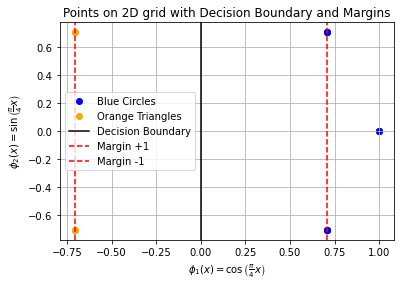

In [42]:
blue_circles = np.array([-9, -8, -7, -1, 0, 1, 7, 8, 9])
orange_triangles = np.array([-5, -3, 3, 5])

# Mapping
def phi(x):
    return np.array([np.cos(np.pi / 4 * x), np.sin(np.pi / 4 * x)])
blue_transf = np.array([phi(x) for x in blue_circles])
orange_transf = np.array([phi(x) for x in orange_triangles])

X_transf = np.vstack((blue_transf, orange_transf))
#targets
y = np.hstack((np.ones(len(blue_circles)), -1 * np.ones(len(orange_triangles))))

w = cp.Variable(2)
b = cp.Variable()

# Constraints,>= 1 for + and <= -1 for -
constraints = [y[i] * (X_transf[i] @ w + b) >= 1 for i in range(len(y))]

# Objective 
objective = cp.Minimize(0.5 * cp.sum_squares(w))

# Form and solve problem
prob = cp.Problem(objective, constraints)
prob.solve()
w_val = w.value
b_val = b.value

# Data
plt.scatter(blue_transf[:, 0], blue_transf[:, 1], color='blue', label='Blue Circles')
plt.scatter(orange_transf[:, 0], orange_transf[:, 1], color='orange', label='Orange Triangles')



# Near w_val[1]=0, the slope is nearly undefined, and decision boundary is a vertical line
if np.isclose(w_val[1], 0, atol=1e-6): 
    # w_val[1]~0
    x_decision = -b_val / w_val[0]
    plt.axvline(x_decision, color='k', label='Decision Boundary')
    plt.axvline(x_decision - 1/np.abs(w_val[0]), color='r', linestyle='--', label='Margin +1')
    plt.axvline(x_decision + 1/np.abs(w_val[0]), color='r', linestyle='--', label='Margin -1')
else:
    # Normal
    x_vals = np.linspace(-1, 1, 100)
    decision_boundary = -(w_val[0] * x_vals + b_val) / w_val[1]
    margin_pos = -(w_val[0] * x_vals + b_val - 1) / w_val[1]
    margin_neg = -(w_val[0] * x_vals + b_val + 1) / w_val[1]
    
    plt.plot(x_vals, decision_boundary, 'k-', label='Decision Boundary')
    plt.plot(x_vals, margin_pos, 'r--', label='Margin +1')
    plt.plot(x_vals, margin_neg, 'r--', label='Margin -1')

plt.xlabel(r'$\phi_1(x) = \cos\left(\frac{\pi}{4} x\right)$')
plt.ylabel(r'$\phi_2(x) = \sin\left(\frac{\pi}{4} x\right)$')
plt.title('Points on 2D grid with Decision Boundary and Margins')
plt.legend()
plt.grid(True)
plt.show()
